In [2]:
import pandas as pd


In [4]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0, parse_dates=True)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2010-01-01 to 2020-01-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2609 non-null   float64
 9   XAU=    2602 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 265.0 KB


In [16]:
data=pd.DataFrame(raw['EUR='])

In [19]:
data.rename(columns = {'EUR=': 'price'}, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2010-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2609 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


In [23]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [24]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-26,1.1096,1.107476,1.118769
2019-12-27,1.1175,1.107540,1.118624
2019-12-30,1.1197,1.107652,1.118505
2019-12-31,1.1210,1.107760,1.118403
2020-01-01,1.1210,1.107960,1.118298


In [25]:
%matplotlib inline
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

<AxesSubplot:title={'center':'EUR/USD | 42 & 252 SMAs'}, xlabel='Date'>

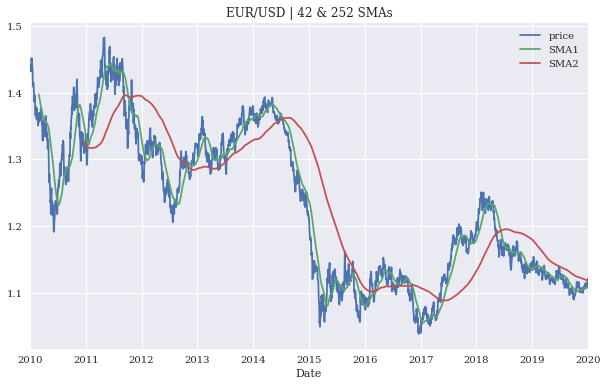

In [26]:
data.plot(title = 'EUR/USD | 42 & 252 SMAs', figsize=(10,6))